# Projet long : reconnaissance d'écriture manuscrite

Ce notebook a pour but d'illustrer les différentes fonctions implémentées lors de notre travail et de présenter les résultats obtenus.

In [1]:
import sys
sys.path.append('../src')

On importe notre modèle :

In [2]:
import torch
from models.CRNN_model import DeepOCR

On crée l'architecture du réseau de neurones :

In [91]:
checkpoint = torch.load('../experiments/base_model_3/best.pth.tar', map_location='cpu')
model = DeepOCR((32,128)).double()
model.load_state_dict(checkpoint['state_dict'])

On importe les classes utiles pour créer notre base d'images :

In [39]:
import torchvision.transforms as tf
from data.make_dataset import IAM_Dataset
from torch.utils.data import DataLoader
from data.data_transform import Rescale, Padding, ToTensor

On crée la dataset, le dataloader et on applique les transformations voulues :

In [40]:
transform = tf.transforms.Compose([Rescale((32,128)), Padding((32,128)), ToTensor()])
train_dataset = IAM_Dataset(root_dir='../data', transform = transform, set = 'training')
train_dataloader = DataLoader(train_dataset, batch_size = 128, shuffle = True, num_workers = 4)

In [41]:
len(train_dataset)

114163

In [42]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

Un exemple d'image de la base de données :

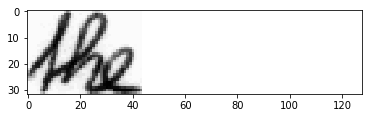

In [43]:
example = train_dataset[65655]
example_img = example['image'].numpy().astype(int).squeeze()
plt.imshow(example_img,cmap='gray')

On essaie avec une image à nous :

In [44]:
from PIL import Image

In [185]:
pil_img = Image.open('../data/test/morning.png').convert('LA')
pil_img = tf.functional.adjust_contrast(pil_img,2)
test_img = np.array(pil_img)[:,:,0]
test_example = {'image': test_img, 'label': 'hello', 'seq_length': 5}
new_transform = tf.transforms.Compose([Rescale((32,128)), Padding((32,128)),ToTensor()])
test_example = transform(test_example)

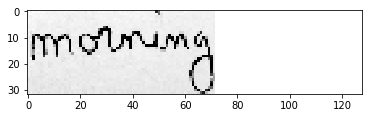

In [186]:
plt.imshow(test_example['image'].numpy().astype(int).squeeze(), cmap='gray')

In [187]:
test_output = model(test_example['image'].unsqueeze(0))

FIN


In [188]:
from utils import prediction
from evaluate import evaluate, similarity
import torch.nn as nn

On crée un batch pour voir les résultats des prédictions :

In [189]:
output = model(example['image'].unsqueeze(0))

In [190]:
prediction(test_output, train_dataset.index_to_char)

['raicning']

In [51]:
val_dataset = IAM_Dataset(root_dir='../data', transform = transform, set = 'validation')
val_dataloader = DataLoader(val_dataset, batch_size = 4, shuffle = True, num_workers = 4)

In [52]:
loss_fn = nn.CTCLoss(0)
metrics = {'similarity': similarity}

In [53]:
evaluate(model, loss_fn, val_dataloader, metrics)

{'similarity': 0.8570429186346141, 'loss': 0.5397925610386598}

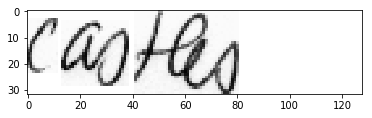

In [119]:
val_example = val_dataset[10]
val_example_img = val_example['image'].numpy().astype(int).squeeze()
plt.imshow(val_example_img,cmap='gray')

In [120]:
val_output = model(val_example['image'].unsqueeze(0))

In [121]:
prediction(val_output,val_dataset.index_to_char)

['castles']

GRAPH

In [82]:
import pickle

In [199]:
with open('../experiments/basic_10_epochs/train.pickle', 'rb') as f:
    train_loss_plot = pickle.load(f)
with open('../experiments/basic_10_epochs/val.pickle', 'rb') as f:
    val_loss_plot = pickle.load(f)
with open('../experiments/basic_20_epochs/train.pickle', 'rb') as f:
    train_loss_plot2 = pickle.load(f)
with open('../experiments/basic_20_epochs/val.pickle', 'rb') as f:
    val_loss_plot2 = pickle.load(f)

In [200]:
train_loss_plot = train_loss_plot+train_loss_plot2
val_loss_plot = val_loss_plot+val_loss_plot2

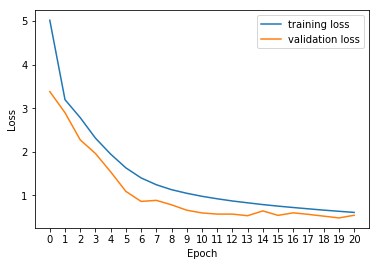

In [201]:
plt.plot(train_loss_plot)
plt.plot(val_loss_plot)
plt.legend(['training loss','validation loss'])
plt.xticks(range(len(train_loss_plot)))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

In [116]:
import enchant

In [117]:
d = enchant.Dict("en_US")

In [205]:
d.suggest("fop")

['op',
 'flop',
 'fops',
 'sop',
 'top',
 'lop',
 'cop',
 'mop',
 'pop',
 'hop',
 'bop',
 'foe',
 'for',
 'fol',
 'fog']